# PL条件下での勾配法の線形収束

参考：
* [Linear Convergence of Gradient and Proximal-Gradient Methods Under the Polyak-Łojasiewicz Condition](https://arxiv.org/abs/1608.04636)
    * この論文は微分可能であることを基本的に仮定してる．平滑関数だけ．
    * [OPT_Grad_PL_non-smooth.ipynb](OPT_Grad_PL_non-smooth.ipynb)に非平滑なケースをまとめ中

今回はPL条件のもとでの勾配法の収束について扱います．
次の制約なし最適化問題を考えましょう：

$$
\underset{x \in \mathbb{R}^d}{\operatorname{argmin}} f(x)
$$

$f$は次の意味で$L$-Lipschitz連続であるとします：
$$
f(y) \leq f(x)+\langle\nabla f(x), y-x\rangle+\frac{L}{2}\|y-x\|^2
$$
また，この最適化問題が空ではない最適解の集合$\mathcal{X}^*$を持つとして，$f^*$を最適値とします．

---

**PL条件**
関数は次を満たすときにPL条件を満たすと言います：
次を満たす定数$\mu > 0$が存在する．

$$
\frac{1}{2}\|\nabla f(x)\|^2 \geq \mu\left(f(x)-f^*\right), \quad \forall x .
$$

**直感** この仮定は
* もし関数が最適値から遠く離れると，その勾配のノルムも大きくなる
* つまり，局所的に「平坦すぎる」領域が存在せず，勾配がゼロに近づく停留点があるなら，それは最適解であることを保証してます．
* 強凸性と異なり，解が唯一であることは必要ありません．

---


## PL条件での線形収束

PL条件下では勾配法は線形に収束します：

---

**定理１**
* $f$が$L$-Lipschitz連続
* $\mathcal{X}^*$が空ではない
* $f$はPL条件を満たす

ときに，次の勾配法を考えましょう：
$$
x_{k+1}=x_k-\frac{1}{L} \nabla f\left(x_k\right)
$$

このとき，この勾配法は
$$
f\left(x_k\right)-f^* \leq\left(1-\frac{\mu}{L}\right)^k\left(f\left(x_0\right)-f^*\right)
$$
で最適値に収束します．

**証明**

Lipschitz連続性と更新方法から，
$$
f\left(x_{k+1}\right)-f\left(x_k\right) \leq-\frac{1}{2 L}\left\|\nabla f\left(x_k\right)\right\|^2
$$
が成立します．PL条件より，明らかに
$$
f\left(x_{k+1}\right)-f\left(x_k\right) \leq-\frac{\mu}{L}\left(f\left(x_k\right)-f^*\right)
$$
が成立します．変形すると$f\left(x_{k+1}\right)-f^* \leq\left(1-\frac{\mu}{L}\right)\left(f\left(x_k\right)-f^*\right)$であり，後はtelescopingで証明終わりです．

**ポイント**：証明がめっちゃシンプルで嬉しい！

---



## 他の条件

PL条件はかなり弱い仮定です．
収束の証明のために，歴史的に様々な仮定が考えられてきました．
以降，$x_p$は$x$を解の空間$\mathcal{X}^*$に射影したベクトルとします．

---

**Strong Convexity (SC)**: 任意の$x, y$について，
$$
f(y) \geq f(x)+\langle\nabla f(x), y-x\rangle+\frac{\mu}{2}\|y-x\|^2
$$

---

**Essential Strong Convexity (ESC)**:
任意の$x_p=y_p$なる$x, y$について，

$$
f(y) \geq f(x)+\langle\nabla f(x), y-x\rangle+\frac{\mu}{2}\|y-x\|^2
$$

* 明らかにStrong convexityの方が強いです．よってSC $\to$ ESCです

---

**Weak Strong Convexity (WSC)**:
任意の$x$について，
$$
f(x_p)=f^* \geq f(x)+\left\langle\nabla f(x), x_p-x\right\rangle+\frac{\mu}{2}\left\|x_p-x\right\|^2
$$

* **直感**：多分「最適解に向かう方向$x_p - x$で強い凸性が保証されている」のかも．強凸と違って，すべての方向で強い凸性を持たなくて良い．
* ESCで$y=x_p$とすれば，WSCになります．よってESC $\to$ WSCです

---

**Restricted Secant Inequality (RSI)**:

$$
\left\langle\nabla f(x), x-x_p\right\rangle \geq \mu\left\|x_p-x\right\|^2
$$

* **直感**：Weak strong convexityと似てるが，凸性ではないかも．$f$が凸ならrestricted strong convexityと呼ばれる．
* WSCを変形すると，$\left\langle\nabla f(x), x-x_p\right\rangle \geq \underbrace{f(x)-f^*}_{\geq 0}+\frac{\mu}{2}\left\|x_p-x\right\|^2$なので，RSIを得ます．よって，WSC $\to$ RSIです

---

**Error Bound (EB)**

$$
\|\nabla f(x)\| \geq \mu\left\|x_p-x\right\| .
$$

* **直感**：PL条件が**最適値**との距離$f(x)-f^*$をバウンドしている一方で，Error boundは**最適解**との距離$\|x_p - x\|$をバウンドしてることに注意．
* RSIでコーシー・シュワルツを使うと，$\|\nabla f(x)\|\left\|x-x_p\right\| \geq\left\langle\nabla f(x), x-x_p\right\rangle \geq \mu\left\|x_p-x\right\|^2$であり，両辺を$\left\|x-x_p\right\|$で割れば，EBが出てきます．よって，RSI $\to$ EBです．

---

**PL条件**

$$
\frac{1}{2}\|\nabla f(x)\|^2 \geq \mu\left(f(x)-f^*\right), \quad \forall x .
$$

* EB $\to$ PLです．
    * Lipschitz連続性から，$f(x) \leq f\left(x_p\right)+\left\langle\nabla f\left(x_p\right), x-x_p\right\rangle+\frac{L}{2}\left\|x_p-x\right\|^2$
    * ここで，$f\left(x_p\right)=f^*$ and $\nabla f\left(x_p\right)=0$なので，$f(x)-f^* \leq \frac{L}{2}\left\|x_p-x\right\|^2 \leq \frac{L}{2 \mu}\|\nabla f(x)\|^2$．証明終わり
* PL $\to$ EBでもあります
    * 次で示しますが，PL $\to$ QGであり，その関係を使うと，$\frac{1}{2}\|\nabla f(x)\|^2 \geq \mu\left(f(x)-f^*\right) \geq \frac{\mu^2}{2}\left\|x-x_p\right\|^2$です．証明終わり．

---

**Quadratic Growth (QG)**

$$
f(x)-f^* \geq \frac{\mu}{2}\left\|x_p-x\right\|^2
$$

* これは強凸性よりも弱い条件です．強凸性は勾配にも二次的な下限を課してますが，QGは関数値の成長が２次的に増えることだけ言ってます．
    * そして，QGだけでは局所最適解が大域的最適解ではないことに注意しましょう．よって，勾配法が大域的最適解に行くかはわかりません．
* $f$が凸ならば，Optimal strong convexityやsemi-strong convexityと呼ばれる．
* PL $\to$ QGです．証明はTODO

---

まとめると，
$$
(S C) \rightarrow(E S C) \rightarrow(W S C) \rightarrow(R S I) \rightarrow(E B) \equiv(P L) \rightarrow(Q G)
$$
が成立し，更に$f$に凸性があるときは
$$
(R S I) \equiv(E B) \equiv(P L) \equiv(Q G)
$$
が成立します．

## Invex関数との関係

PL条件を満たしても凸とは限りませんが，より弱い条件であるinvex性は満たします．
ある関数は，次を満たすときにinvexであると言います：

* 微分可能である
* 次を満たすベクトル関数$\eta$が存在する：任意の$x, y \in \mathbb{R}^n$について，

$$
f(y) \geq f(x)+\nabla f(x)^T \eta(x, y)
$$

---

**invex関数の性質**

* もちろん，$\eta(x, y)=y-x$のときに$f$は凸関数です．
* なめらかな関数$f$は，任意の停留点が大域的最適解であることが必要十分条件です．[Invex functions and duality](https://www.cambridge.org/core/journals/journal-of-the-australian-mathematical-society/article/invex-functions-and-duality/17C4993C6394B695564E58C522F99101)参照．
    * PL条件を満たすと任意の停留点が大域的最適解なので，PL条件を満たす関数はinvexです．
    * また，上の例から，PL条件よりも強い仮定のクラスはすべてinvexです． 
* 例えば$x^2+3 \sin ^2(x)$はinvexですが，凸ではありません．

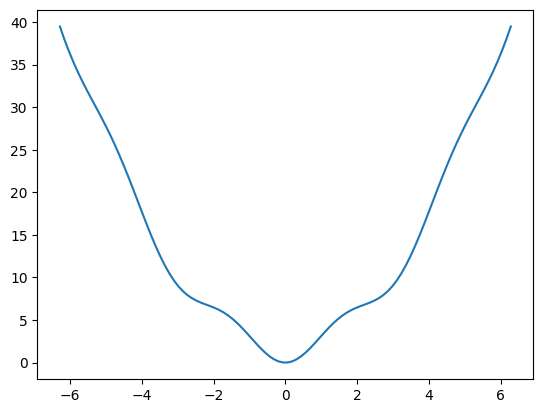

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-2*np.pi, 2*np.pi, 100)
y = x ** 2 + 3 * np.sin(x) ** 2

plt.plot(x, y)

## 確率的座標降下法と確率的勾配法での収束

### 確率的座標降下法

座標降下法の解析をするために，座標ごとにLipschitz性を仮定します．
任意の$x, y$について，
$$
f\left(x+\alpha e_i\right) \leq f(x)+\alpha \nabla_i f(x)+\frac{L}{2} \alpha^2, \quad \forall \alpha \in \mathbb{R}, \quad \forall x \in \mathbb{R}^d,
$$
とします．ここで$e_i$は$i$番目が1で他が0のベクトルです．

ここで，次の確率的座標降下法を考えましょう．ステップ幅が$1/L$で，一様分布から$i_k$を選択します：
$$
x_{k+1}=x_k-\frac{1}{L} \nabla_{i_k} f\left(x_k\right) e_{i_k}
$$
このとき，次の収束レートを達成します：

$$
\mathbb{E}\left[f\left(x_k\right)-f^*\right] \leq\left(1-\frac{\mu}{d L}\right)^k\left[f\left(x_0\right)-f^*\right] .
$$

**証明**

Lipschitz性と更新方法から，
$$
f\left(x_{k+1}\right) \leq f\left(x_k\right)-\frac{1}{2 L}\left|\nabla_{i_k} f\left(x_k\right)\right|^2
$$
が成立します．両辺で期待値を取ると，
$$
\begin{aligned}
\mathbb{E}\left[f\left(x_{k+1}\right)\right] & \leq f\left(x_k\right)-\frac{1}{2 L} \mathbb{E}\left[\left|\nabla_{i_k} f\left(x_k\right)\right|^2\right] \\
& =f\left(x_k\right)-\frac{1}{2 L} \sum_i \frac{1}{d}\left|\nabla_i f\left(x_k\right)\right|^2 \\
& =f\left(x_k\right)-\frac{1}{2 d L}\left\|\nabla f\left(x_k\right)\right\|^2 .
\end{aligned}
$$

PL条件と，両辺から$f^*$を引くと，

$$
\mathbb{E}\left[f\left(x_{k+1}\right)-f^*\right] \leq\left(1-\frac{\mu}{d L}\right)\left[f\left(x_k\right)-f^*\right]
$$

### 貪欲座標降下：TODO

sparseな問題ではこっちのほうが強いみたい．
貪欲座標降下法では，$i_k=\operatorname{argmax}_j\left|\nabla_j f\left(x_k\right)\right|$として座標を選択します．
このとき，
$$
\max _i\left|\nabla_i f\left(x_k\right)\right| \geq \frac{1}{d} \sum_{i=1}^d\left|\nabla_i f\left(x_k\right)\right|
$$
なので，確率的座標降下法の解析から，こちらも同じ収束レートを達成します．

---

**補足：強めの収束レート**

特に$L_1$ノルムの場合は収束レートを改善できます．
PL条件は双対空間に定義されるので，$L_1$ノルムの双対ノルムである$L_\infty$ノルムを使って，PL不等式は
$$
\frac{1}{2}\|\nabla f(x)\|_{\infty}^2 \geq \mu_1\left(f(x)-f^*\right)
$$
です．$\left|\nabla_{i_k} f\left(x_k\right)\right|=\left\|\nabla f\left(x_k\right)\right\|_{\infty}$なので，上の解析を転用すれば，関数$f$が$\infty$ノルムについてのPL条件を満たすときに，
$$
f\left(x_k\right)-f^* \leq\left(1-\frac{\mu_1}{L}\right)^k\left[f\left(x_0\right)-f^*\right]
$$
が成立します．


### 確率的勾配法

確率的な最適化問題を考えましょう：

$$
\underset{x \in \mathbb{R}^d}{\operatorname{argmin}} f(x)=\mathbb{E}\left[f_i(x)\right]
$$

ここで，期待値は$i$について取られてます．
大体の場合では，有限な$i$についての和を考えることが多いです：$f(x)=\frac{1}{n} \sum_i^n f_i(x)$．

確率的勾配法は$n$が大きいときに便利な手法です．
確率的勾配法では次を繰り返します：
$$
x_{k+1}=x_k-\alpha_k \nabla f_{i_k}\left(x_k\right)
$$

ここで，$i_k$は$\mathbb{E}\left[\nabla f_{i_k}\left(x_k\right)\right]=\nabla f\left(x_k\right)$を満たすような分布からサンプルされた$f_i$のインデックスです．

このとき，次が成立します：

---

次を仮定します：
1. $f$は$L$-リプシッツ連続
2. $f$は空でない回の集合$X^*$を持つ
3. $f$はPL条件を満たす
4. $\mathbb{E}\left[\left\|\nabla f_i\left(x_k\right)\right\|^2\right] \leq C^2$

このとき，確率的勾配法を$\alpha_k=\frac{2 k+1}{2 \mu(k+1)^2}$として更新すると，
$$
\mathbb{E}\left[f\left(x_k\right)-f^*\right] \leq \frac{L C^2}{2 k \mu^2}
$$
が成立します．さらに定数$t \alpha_k=\alpha<\frac{1}{2 \mu}$のとき，線形収束
$$
\mathbb{E}\left[f\left(x_k\right)-f^*\right] \leq(1-2 \mu \alpha)^k\left[f\left(x_0\right)-f^*\right]+\frac{L C^2 \alpha}{4 \mu} .
$$
を達成します．

---

**証明**

TODO: 気が向いたら書く
